In [3]:
import os
import nibabel as nib
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
import nibabel as nib
from nilearn.image import mean_img, index_img
import itk              # 2D 및 3D 이미지 시각화 라이브러리
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import torchio as tio

In [5]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import nibabel as nib
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.nn import Sequential

* GPU

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [7]:
import sys
import torch

# SwinTransformer4D 클래스 임포트
from SwiFT.project.module.models.swin4d_transformer_ver7 import SwinTransformer4D



BNB_CUDA_VERSION=XXX can be used to load a bitsandbytes version that is different from the PyTorch CUDA version.
If this was unintended set the BNB_CUDA_VERSION variable to an empty string: export BNB_CUDA_VERSION=
If you use the manual override make sure the right libcudart.so is in your LD_LIBRARY_PATH
For example by adding the following to your .bashrc: export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:<path_to_cuda_dir/lib64
Loading: libbitsandbytes_cuda123_nocublaslt123.so


Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes


/usr/local/lib/python3.10/dist-packages/cv2/../../lib64:/usr/local/cuda/compat/lib.real:/usr/local/lib/python3.10/dist-packages/torch/lib:/usr/local/lib/python3.10/dist-packages/torch_tensorrt/lib:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda-12.3:/usr/local/cuda-12.3/include:/usr/include/x86_64-linux-gnu did not contain ['libcudart.so', 'libcudart.so.11.0', 'libc

False

===================================BUG REPORT===================================
The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/cuda/extras/CUPTI/lib64'), PosixPath('/usr/local/nvidia/lib64'), PosixPath('/usr/local/lib/python3.10/dist-packages/cv2/../../lib64')}
The following directories listed in your path were found to be non-existent: {PosixPath('8091'), PosixPath('//0.0.0.0'), PosixPath('http')}
The following directories listed in your path were found to be non-existent: {PosixPath('7080/bai/ngc-pytorch'), PosixPath('24.01-pytorch2.2-py310-cuda12.3'), PosixPath('bai-repo')}
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
DEBUG: Possible options found for libcudart.so: {PosixPath('/usr/local/cuda/lib64/libcudart.so')}
CUDA SETUP: PyTorch settings found: CUDA_VERSION=123, Highest Compute Capability: 7.0.
CUDA SETUP: To manually override the PyTorch CUDA version please see:h

In [8]:
model = SwinTransformer4D(
    img_size=(96, 96, 96, 20),
    in_chans=1,
    embed_dim=36,
    window_size=(4, 4, 4, 4),
    first_window_size=(4, 4, 4, 4),
    patch_size=(6, 6, 6, 1),
    depths=(2, 2, 6, 2),
    num_heads=(3, 6, 12, 24),
    downsample="mergingv2",
).to(device)

img_size:  (96, 96, 96, 20)
patch_size:  (6, 6, 6, 1)
patch_dim:  (16, 16, 16, 20)


In [9]:
class Dict2Class:
    def __init__(self, **kwargs):
        for key, value in kwargs.items():
            setattr(self, key, value)
weight_path = '/home/work/DLmath/KiHwanLee/SwiFT/SwiFT_tutorial_official/SwiFT/pretrained_models/contrastive_pretrained.ckpt'
ckpt = torch.load(weight_path, map_location='cuda:0' if torch.cuda.is_available() else 'cpu')
hparams = Dict2Class(**ckpt['hyper_parameters'])


model = model.to(device)

In [11]:
def rename_keys(state_dict):
    """
    'model.' 접두사를 제거하여 키 이름을 변경합니다.
    """
    new_state_dict = {}
    for k, v in state_dict.items():
        new_key = k.replace("model.", "")
        new_state_dict[new_key] = v
    return new_state_dict

checkpoint = torch.load(weight_path)
new_state_dict = rename_keys(checkpoint['state_dict'])

In [13]:
output = model(torch.randn(2,1,96,96,96,20).to(device))

# 결과 확인
print(output.shape)
print(output[0,0,:,:,:,0])

torch.Size([2, 288, 2, 2, 2, 20])
tensor([[[-0.9968, -1.4894],
         [-1.2738, -0.8806]],

        [[-0.8400, -1.4439],
         [-0.9785, -1.1928]]], device='cuda:0', grad_fn=<SelectBackward0>)


# CSV

In [14]:
import pandas as pd
df = pd.read_csv('/home/work/DLmath/KiHwanLee/SwiFT/XFD/OASIS3_csv/final_df_over76.csv')
df

,n_val,Subject,Gender,perscare,sumbox,homehobb,ageAtEntry,cdr,orient,dx1,memory,commun,judgment
0,OAS30598_ses-d0069,OAS30598,male,0.0,0.0,0.0,79.375770,0.0,0.0,Cognitively normal,0.0,0.0,0.0
1,OAS30598_ses-d0069,OAS30598,male,0.0,0.0,0.0,79.375770,0.0,0.0,Cognitively normal,0.0,0.0,0.0
2,OAS30592_ses-d0087,OAS30592,male,0.0,0.0,0.0,80.158800,0.0,0.0,Cognitively normal,0.0,0.0,0.0
3,OAS30592_ses-d0087,OAS30592,male,0.0,0.0,0.0,80.158800,0.0,0.0,Cognitively normal,0.0,0.0,0.0
4,OAS30578_ses-d0130,OAS30578,female,0.0,1.0,0.0,79.704315,0.5,0.0,AD Dementia,0.5,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,OAS30033_ses-d1267,OAS30033,female,0.0,0.0,0.0,79.383980,0.0,0.0,Cognitively normal,0.0,0.0,0.0
452,OAS30031_ses-d0427,OAS30031,female,1.0,6.0,0.5,80.128680,1.0,1.0,AD Dementia,1.0,0.5,2.0
453,OAS30031_ses-d0427,OAS30031,female,1.0,6.0,0.5,80.128680,1.0,1.0,AD Dementia,1.0,0.5,2.0
454,OAS30026_ses-d0696,OAS30026,male,0.0,0.0,0.0,80.377820,0.0,0.0,Cognitively normal,0.0,0.0,0.0


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['dx1'] = le.fit_transform(df['dx1'])

In [18]:
path = '/home/work/DLmath/KiHwanLee/SwiFT/XFD/DataPreprocess/preprocessed_data2'
data_lst = os.listdir(path)
len(data_lst)

740

In [19]:
n_val_set = set(df['n_val'])
f_data_lst = [i for i in data_lst if i[21:39] in n_val_set]
print(len(f_data_lst))

456


In [20]:
df['f_data_lst'] = f_data_lst
df['f_data_lst'] = df['f_data_lst'].apply(lambda x : os.path.join(path, x))
df['f_data_lst'][0]

'/home/work/DLmath/KiHwanLee/SwiFT/XFD/DataPreprocess/preprocessed_data2/padded_processed_sub-OAS30598_ses-d0069_task-rest_run-01_bold.nii.gz'

In [21]:
df = df.drop([37, 180, 182, 208, 270, 348, 369]).reset_index(drop=True)
df

,n_val,Subject,Gender,perscare,sumbox,homehobb,ageAtEntry,cdr,orient,dx1,memory,commun,judgment,f_data_lst
0,OAS30598_ses-d0069,OAS30598,1,0.0,0.0,0.0,79.375770,0.0,0.0,8,0.0,0.0,0.0,/home/work/DLmath/KiHwanLee/SwiFT/XFD/DataPrep...
1,OAS30598_ses-d0069,OAS30598,1,0.0,0.0,0.0,79.375770,0.0,0.0,8,0.0,0.0,0.0,/home/work/DLmath/KiHwanLee/SwiFT/XFD/DataPrep...
2,OAS30592_ses-d0087,OAS30592,1,0.0,0.0,0.0,80.158800,0.0,0.0,8,0.0,0.0,0.0,/home/work/DLmath/KiHwanLee/SwiFT/XFD/DataPrep...
3,OAS30592_ses-d0087,OAS30592,1,0.0,0.0,0.0,80.158800,0.0,0.0,8,0.0,0.0,0.0,/home/work/DLmath/KiHwanLee/SwiFT/XFD/DataPrep...
4,OAS30578_ses-d0130,OAS30578,0,0.0,1.0,0.0,79.704315,0.5,0.0,1,0.5,0.0,0.5,/home/work/DLmath/KiHwanLee/SwiFT/XFD/DataPrep...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,OAS30033_ses-d1267,OAS30033,0,0.0,0.0,0.0,79.383980,0.0,0.0,8,0.0,0.0,0.0,/home/work/DLmath/KiHwanLee/SwiFT/XFD/DataPrep...
445,OAS30031_ses-d0427,OAS30031,0,1.0,6.0,0.5,80.128680,1.0,1.0,1,1.0,0.5,2.0,/home/work/DLmath/KiHwanLee/SwiFT/XFD/DataPrep...
446,OAS30031_ses-d0427,OAS30031,0,1.0,6.0,0.5,80.128680,1.0,1.0,1,1.0,0.5,2.0,/home/work/DLmath/KiHwanLee/SwiFT/XFD/DataPrep...
447,OAS30026_ses-d0696,OAS30026,1,0.0,0.0,0.0,80.377820,0.0,0.0,8,0.0,0.0,0.0,/home/work/DLmath/KiHwanLee/SwiFT/XFD/DataPrep...


# Multimodal using SwiFT

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Dataset

In [23]:
class SwiFTMM_D(Dataset):
    def __init__(self, data_frame, transform=None):
        self.data_frame = data_frame
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        data = nib.load(self.data_frame.iloc[idx,-1])
        image = data.get_fdata()
        image = image[:,:,:,:20]
        
        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0)

        tabular_data = torch.tensor(self.data_frame.iloc[idx, 3:-1].values.astype(float), dtype=torch.float32)
        target = torch.tensor(self.data_frame.iloc[idx, 2], dtype=torch.long)

        return image, tabular_data, target

In [24]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.21, random_state=42)

train_dataset = SwiFTMM_D(train_df)
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_dataset = SwiFTMM_D(val_df)
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_dataset = SwiFTMM_D(test_df)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [25]:
print(len(train_dataset),len(val_dataset),len(test_dataset))

283 76 90


In [26]:
# a = next(iter(train_dataloader))

In [27]:
# a[0].shape

In [28]:
# a[1].shape

In [29]:
# a[2]

In [30]:
# model(torch.randn(4, 1, 96, 96, 96, 20).to(device)).shape

### SwiFTMM model

In [31]:
class SwiFTMM(nn.Module):
    def __init__(self, model):
        super(SwiFTMM, self).__init__()
        self.model = model
        for param in self.model.parameters():
            param.requires_grad = False
        
        self.conv1 = nn.Sequential(
            nn.Conv3d(288, 128, kernel_size=1, padding=0),
            nn.ReLU(),
            nn.Conv3d(128, 64, kernel_size=1, padding=0),
            nn.ReLU(),
            nn.Conv3d(64, 32, kernel_size=1, padding=0),
            nn.ReLU(),
        )
        self.conv2 = nn.Sequential(
            nn.Conv3d(288, 128, kernel_size=1, padding=0),
            nn.ReLU(),
            nn.Conv3d(128, 64, kernel_size=1, padding=0),
            nn.ReLU(),
            nn.Conv3d(64, 32, kernel_size=1, padding=0),
            nn.ReLU(),
        )
        self.conv3 = nn.Sequential(
            nn.Conv3d(288, 128, kernel_size=1, padding=0),
            nn.ReLU(),
            nn.Conv3d(128, 64, kernel_size=1, padding=0),
            nn.ReLU(),
            nn.Conv3d(64, 32, kernel_size=1, padding=0),
            nn.ReLU(),
        )
        self.conv4 = nn.Sequential(
            nn.Conv3d(288, 128, kernel_size=1, padding=0),
            nn.ReLU(),
            nn.Conv3d(128, 64, kernel_size=1, padding=0),
            nn.ReLU(),
            nn.Conv3d(64, 32, kernel_size=1, padding=0),
            nn.ReLU(),
        )
        self.conv5 = nn.Sequential(
            nn.Conv3d(288, 128, kernel_size=1, padding=0),
            nn.ReLU(),
            nn.Conv3d(128, 64, kernel_size=1, padding=0),
            nn.ReLU(),
            nn.Conv3d(64, 32, kernel_size=1, padding=0),
            nn.ReLU(),
        )
        
        self.bilstm = nn.LSTM(input_size=32 * 2 * 2 * 2, hidden_size=128, num_layers=1, batch_first=True, bidirectional=True)
        
        self.tab = nn.Sequential(
            nn.Linear(10, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
        )
        
        self.cls_layer = nn.Sequential(
            nn.Linear(256 + 256, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
        
        
    def forward(self, x, t):
        x = self.model(x)
        
        x1 = self.conv1(x[:,:,:,:,:,:4].mean(dim=-1)) 
        x2 = self.conv2(x[:,:,:,:,:,4:8].mean(dim=-1))  
        x3 = self.conv3(x[:,:,:,:,:,8:12].mean(dim=-1))
        x4 = self.conv4(x[:,:,:,:,:,12:16].mean(dim=-1))
        x5 = self.conv5(x[:,:,:,:,:,16:].mean(dim=-1))  
        
        conv_outputs = torch.stack([x1, x2, x3, x4, x5], dim=1)  
        conv_outputs = conv_outputs.view(conv_outputs.size(0), conv_outputs.size(1), -1) 
        
        lstm_out, _ = self.bilstm(conv_outputs) 
        lstm_out = lstm_out[:, -1, :]  
        
        o_tab = self.tab(t)
        
        combined = torch.cat((lstm_out, o_tab), dim=1)
        
        output = self.cls_layer(combined)
        
        return output

In [32]:
# m = SwiFTMM(model).to(device)
# output = m(a[0].to(device), a[1].to(device))
# output.shape

### Training the model

In [33]:
swift_mm = SwiFTMM(model).to(device)
optimizer = torch.optim.Adam(swift_mm.parameters(), lr=1e-4)
criterion = nn.BCELoss().to(device)

In [34]:
best_val_loss = float('inf')
patience = 5
patience_counter = 0

In [35]:
def save_checkpoint(model, optimizer, epoch, val_loss, train_accuracies, val_accuracies, filename):
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'val_loss': val_loss,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies
    }
    torch.save(checkpoint, filename)
    print(f"Saved checkpoint at epoch {epoch} with validation loss: {val_loss:.4f}")

In [36]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 20

for epoch in range(epochs):
    swift_mm.train()
    train_loss = 0
    correct_class = 0
    total_class = 0
    
    for image, tabular, target in train_dataloader:

        image = image.to(device)
        tabular = tabular.to(device)
        target = target.to(device)

        optimizer.zero_grad()
        output = swift_mm(image, tabular)
        
        loss = criterion(output.squeeze(), target.float())
        print(f'Good!! loss : {loss}')
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
        total_class += target.size(0)
        correct_class += (torch.round(output).view(-1).long() == target).sum().item()
    
    train_losses.append(train_loss / len(train_dataloader))
    train_accuracies.append(correct_class / total_class)
    
    # Validation
    model.eval()
    val_loss = 0
    correct_class = 0
    total_class = 0
    
    with torch.no_grad():
        for image, tabular, target in val_dataloader:

            image = image.to(device)
            tabular = tabular.to(device)
            target = target.to(device)

            output = swift_mm(image, tabular)
            loss = criterion(output.squeeze(), target.float())
            val_loss += loss.item()
            
            total_class += target.size(0)
            correct_class += (torch.round(output).view(-1).long() == target).sum().item()
    
    val_losses.append(val_loss / len(val_dataloader))
    val_accuracies.append(correct_class / total_class)

    print(f"Epoch [{epoch+1}/20], Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}")


    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        patience_counter = 0
        save_checkpoint(swift_mm, optimizer, epoch+1, best_val_loss, train_accuracies, val_accuracies, f"/home/work/DLmath/KiHwanLee/SwiFT/SwiFT_tutorial_official/SwiFTMM_S_lstm/swift_mm_checkpoint_epoch_{epoch+1}.pt")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1} with validation loss: {val_losses[-1]:.4f}")
            break


Good!! loss : 0.6931825876235962
Good!! loss : 0.6931514143943787
Good!! loss : 0.6931569576263428
Good!! loss : 0.6931848526000977
Good!! loss : 0.6912295818328857
Good!! loss : 0.6908891201019287
Good!! loss : 0.6931619048118591
Good!! loss : 0.6900215148925781
Good!! loss : 0.6931674480438232
Good!! loss : 0.6971442103385925
Good!! loss : 0.6891072988510132
Good!! loss : 0.6975129246711731
Good!! loss : 0.6930553317070007
Good!! loss : 0.6931302547454834
Good!! loss : 0.688919723033905
Good!! loss : 0.6933469772338867
Good!! loss : 0.6931825280189514
Good!! loss : 0.7027859687805176
Good!! loss : 0.6885100603103638
Good!! loss : 0.6979236006736755
Good!! loss : 0.6886394023895264
Good!! loss : 0.6886461973190308
Good!! loss : 0.6931362152099609
Good!! loss : 0.7023805379867554
Good!! loss : 0.6886646747589111
Good!! loss : 0.6930692195892334
Good!! loss : 0.7022794485092163
Good!! loss : 0.6974902153015137
Good!! loss : 0.6973332166671753
Good!! loss : 0.6931827664375305
Good!! loss

Good!! loss : 0.919248640537262
Good!! loss : 0.6402496099472046
Good!! loss : 0.7294125556945801
Good!! loss : 0.3670574128627777
Good!! loss : 0.7578059434890747
Good!! loss : 0.6923700571060181
Good!! loss : 0.2879737317562103
Good!! loss : 0.4015823006629944
Good!! loss : 0.33316460251808167
Good!! loss : 0.1463332325220108
Good!! loss : 0.8430879712104797
Good!! loss : 0.14324527978897095
Good!! loss : 0.7501764297485352
Good!! loss : 0.5845755338668823
Good!! loss : 0.6317934989929199
Good!! loss : 0.4968374967575073
Good!! loss : 1.0181523561477661
Good!! loss : 0.41520971059799194
Good!! loss : 0.5054630637168884
Good!! loss : 0.4183388352394104
Good!! loss : 0.2924482822418213
Good!! loss : 0.40877652168273926
Good!! loss : 0.604915976524353
Good!! loss : 0.6677337288856506
Good!! loss : 0.6283277273178101
Good!! loss : 0.3829330801963806
Good!! loss : 0.4131608009338379
Good!! loss : 0.6547409892082214
Good!! loss : 0.4963380694389343
Good!! loss : 0.6682007908821106
Good!! l

Good!! loss : 0.29303431510925293
Good!! loss : 0.7247800230979919
Good!! loss : 0.15956763923168182
Good!! loss : 0.8392539024353027
Good!! loss : 0.556387186050415
Good!! loss : 0.7124473452568054
Good!! loss : 0.9146397113800049
Good!! loss : 1.2342443466186523
Good!! loss : 0.6554814577102661
Good!! loss : 0.4965921938419342
Good!! loss : 0.7340673208236694
Good!! loss : 0.6012039184570312
Good!! loss : 0.3063128590583801
Good!! loss : 0.24227797985076904
Good!! loss : 0.6069337129592896
Good!! loss : 0.21766504645347595
Good!! loss : 0.5688390135765076
Good!! loss : 0.2679469883441925
Good!! loss : 0.48867911100387573
Good!! loss : 0.281466543674469
Good!! loss : 1.2754836082458496
Good!! loss : 1.2007858753204346
Epoch [7/20], Train Loss: 0.4969, Train Acc: 0.7845, Val Loss: 0.5613, Val Acc: 0.7237
Good!! loss : 0.2575737535953522
Good!! loss : 0.6733816862106323
Good!! loss : 0.2473316788673401
Good!! loss : 0.898932933807373
Good!! loss : 0.7386852502822876
Good!! loss : 0.2394

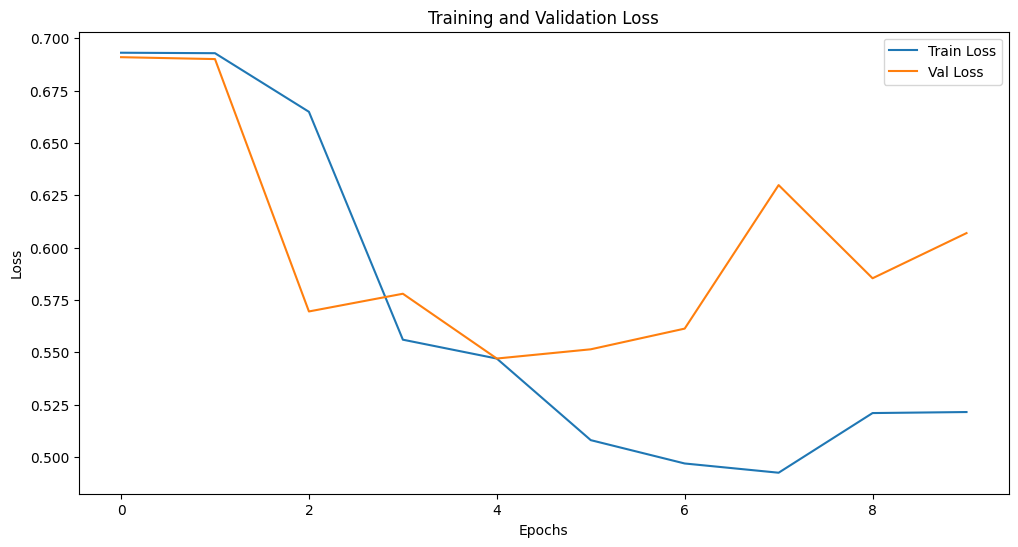

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('loss_plot.png')
plt.show()

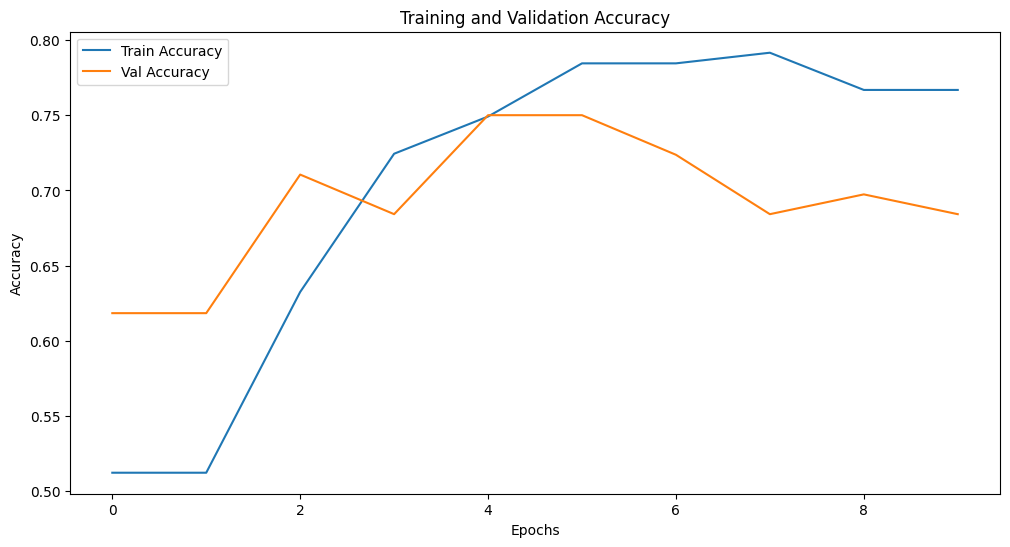

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.savefig('acc_plot.png')
plt.show()

### Testing the model

In [40]:
swift_mm.eval()

correct_class = 0
total_class = 0

with torch.no_grad():
    for image, tabular, target in test_dataloader:
        image = image.to(device)
        tabular = tabular.to(device)
        target = target.to(device)

        output = swift_mm(image, tabular)
        
        total_class += target.size(0)
        correct_class += (torch.round(output).view(-1).long() == target).sum().item()

        
test_accuracy = correct_class / total_class
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7889
